# In Context Learning

In-Context Learning (ICL) in prompt engineering refers to the ability of large language models to adapt and perform tasks based on examples provided within the prompt itself, without requiring fine-tuning or additional training. This technique leverages the model's existing knowledge and pattern recognition capabilities to understand and emulate the desired behavior or output format. 

By including relevant examples or demonstrations directly in the prompt (referred to as 'Few-Shot' prompting), users can guide the model to produce more accurate and contextually appropriate responses for specific tasks. ICL allows for quick adaptation to new tasks or domains, making it a powerful and flexible approach in prompt engineering for enhancing model performance across various applications.

### Language Models are Few-Shot Learners

This paper, which introduced GPT-3 (Generative Pre-trained Transformer 3), demonstrated the remarkable ability of large language models to perform various tasks with minimal task-specific examples provided in the prompt.
The authors showed that GPT-3 could adapt to new tasks simply by presenting it with a few examples in the input prompt, without any gradient updates or fine-tuning, leading to double-digit improvements in accuracy.

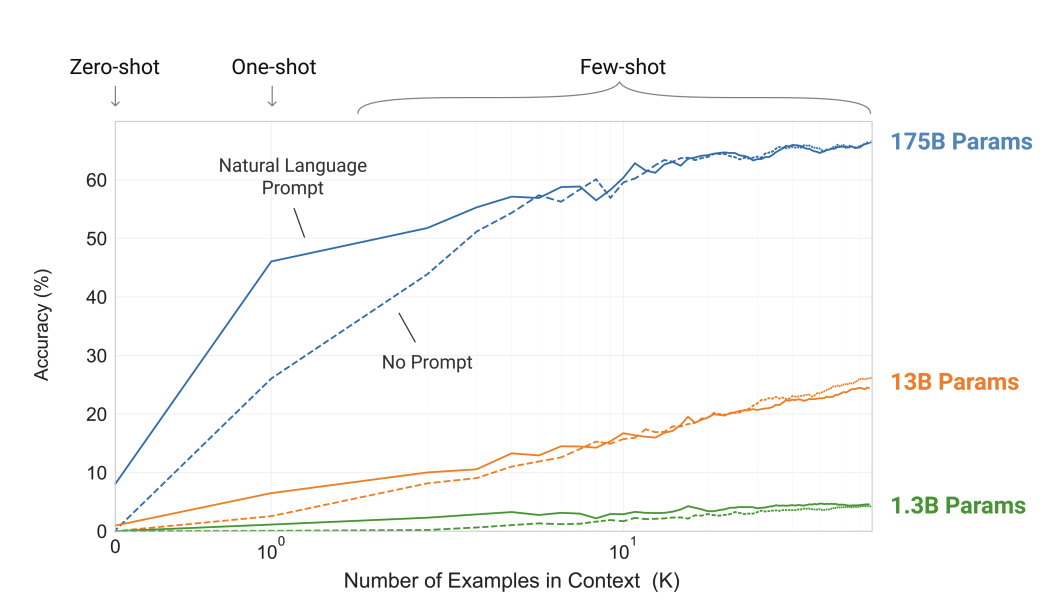

This emergent capability, which they termed "in-context learning," marked a significant advancement in the field of natural language processing and prompt engineering. It's worth noting that while this paper brought widespread attention to the concept, it builds upon earlier work in transfer learning and meta-learning. However, the scale and effectiveness demonstrated in the GPT-3 paper made it a landmark study in the field of prompt engineering and large language models.

> [Language Models are Few-Shot Learners](https://arxiv.org/abs/2005.14165) by Brown, T., et al. (2020)

In [1]:
# Zero-shot prompting provides no examples

prompt_zero_shot = """Brainstorm a list of product names for a shoe that fits any foot size, in the style of Steve Jobs.

Return the results as a comma separated list, in this format:
Product description: A shoe that fits any foot size
Product names: [list of 3 product names]"""

# call openai with this prompt
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": prompt_zero_shot}
    ]
)

print(response.choices[0].message.content)


Product description: A shoe that fits any foot size
Product names: FootSync, SizeMagic, SoleMate


In [4]:
# Few-shot prompting provides 1-5 examples

examples = [
    {
        "description": "A refrigerator that dispenses beer",
        "names": "iBarFridge, iFridgeBeer, iDrinkBeerFridge"
    },
    {
        "description": "A watch that can tell accurate time in space",
        "names": "iNaut, iSpace, iTime"
    },
    {
        "description": "A home milkshake maker",
        "names": "iShake, iSmoothie, iShake Mini"
    }
]

prompt_few_shot = prompt_zero_shot + "\n\n## Examples"

for example in examples:
    prompt_few_shot += f"\nProduct description: {example['description']}\n"
    prompt_few_shot += f"Product names: {example['names']}\n"

print(prompt_few_shot)

Brainstorm a list of product names for a shoe that fits any foot size, in the style of Steve Jobs.

Return the results as a comma separated list, in this format:
Product description: A shoe that fits any foot size
Product names: [list of 3 product names]

## Examples
Product description: A refrigerator that dispenses beer
Product names: iBarFridge, iFridgeBeer, iDrinkBeerFridge

Product description: A watch that can tell accurate time in space
Product names: iNaut, iSpace, iTime

Product description: A home milkshake maker
Product names: iShake, iSmoothie, iShake Mini



In [5]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": prompt_few_shot}
    ]
)

print(response.choices[0].message.content)

Product description: A shoe that fits any foot size
Product names: iFitSole, iStride, iStepFlex


In [9]:
def eval_names_start_with_i(response):
    """
    Evaluates the percentage of product names in the response that start with 'i'.
    
    Args:
    response (str): The full response string from the API.
    
    Returns:
    float: The percentage of names that start with 'i' (case-insensitive).
    """
    # Split the response to get the product names part
    product_names_part = response.split("Product names:")[-1].strip()
    
    # Remove brackets and split names by comma
    names = [name.strip() for name in product_names_part.strip("[]").split(",")]
    
    # Count names starting with 'i' and calculate percentage
    i_count = sum(name.lower().startswith('i') for name in names)
    total_names = len(names)
    
    # Return the percentage (avoid division by zero)
    return (i_count / total_names * 100) if total_names > 0 else 0

# Test the function with a sample response
sample_response = """Product description: A shoe that fits any foot size
Product names: iShoe, FitAll, iSize"""

results = eval_names_start_with_i(sample_response)
print("Evaluation results:", results)

# Print individual results
for name in sample_response.split("Product names:")[-1].strip("[]").split(","):
    result = name.strip().lower().startswith('i')
    print(f"'{name.strip()}' starts with 'i': {result}")



Evaluation results: 66.66666666666666
'iShoe' starts with 'i': True
'FitAll' starts with 'i': False
'iSize' starts with 'i': True


In [10]:
# Create the one, two, three shot prompts
prompt_one_shot = prompt_zero_shot + "\n\n## Example"
prompt_one_shot += f"\nProduct description: {examples[0]['description']}\n"
prompt_one_shot += f"Product names: {examples[0]['names']}\n"

prompt_two_shot = prompt_one_shot
prompt_two_shot += f"\nProduct description: {examples[1]['description']}\n"
prompt_two_shot += f"Product names: {examples[1]['names']}\n"

prompt_three_shot = prompt_two_shot
prompt_three_shot += f"\nProduct description: {examples[2]['description']}\n"
prompt_three_shot += f"Product names: {examples[2]['names']}\n"

# print out the prompts
print("---\nZero-shot prompt:\n---")
print(prompt_zero_shot, "\n")

print("---\nOne-shot prompt:\n---")
print(prompt_one_shot, "\n")

print("---\nTwo-shot prompt:\n---")
print(prompt_two_shot, "\n")

print("---\nThree-shot prompt:\n---")
print(prompt_three_shot, "\n")



---
Zero-shot prompt:
---
Brainstorm a list of product names for a shoe that fits any foot size, in the style of Steve Jobs.

Return the results as a comma separated list, in this format:
Product description: A shoe that fits any foot size
Product names: [list of 3 product names] 

---
One-shot prompt:
---
Brainstorm a list of product names for a shoe that fits any foot size, in the style of Steve Jobs.

Return the results as a comma separated list, in this format:
Product description: A shoe that fits any foot size
Product names: [list of 3 product names]

## Example
Product description: A refrigerator that dispenses beer
Product names: iBarFridge, iFridgeBeer, iDrinkBeerFridge
 

---
Two-shot prompt:
---
Brainstorm a list of product names for a shoe that fits any foot size, in the style of Steve Jobs.

Return the results as a comma separated list, in this format:
Product description: A shoe that fits any foot size
Product names: [list of 3 product names]

## Example
Product descripti

In [11]:
# Run the zero shot and few shot prompts 30 times each and count the number of correct responses as a percentage of the total
import asyncio
import nest_asyncio

nest_asyncio.apply() # to run async in jupyter notebook

from openai import AsyncOpenAI
async_client = AsyncOpenAI()

async def run_and_evaluate(prompt, num_runs=30):
    """
    Runs the given prompt multiple times and evaluates the accuracy of the responses asynchronously.

    This function sends the provided prompt to the GPT-3.5-turbo model multiple times,
    evaluates each response to check if all product names start with 'i',
    and calculates the percentage of correct responses.

    Args:
    prompt (str): The prompt to be sent to the model.
    num_runs (int): The number of times to run the prompt. Defaults to 30.

    Returns:
    float: The percentage of correct responses (where all product names start with 'i').
    """
    async def process_single_run():
        response = await async_client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        content = response.choices[0].message.content
        percentage = eval_names_start_with_i(content)
        return percentage

    tasks = [process_single_run() for _ in range(num_runs)]
    results = await asyncio.gather(*tasks)
    correct_count = sum(results) / len(results)
    return correct_count

# ... rest of the code remains the same

async def main():
    zero_shot_accuracy = await run_and_evaluate(prompt_zero_shot)
    print(f"Zero-shot accuracy: {zero_shot_accuracy:.2f}%")

    one_shot_accuracy = await run_and_evaluate(prompt_one_shot)
    print(f"One-shot accuracy: {one_shot_accuracy:.2f}%")

    two_shot_accuracy = await run_and_evaluate(prompt_two_shot)
    print(f"Two-shot accuracy: {two_shot_accuracy:.2f}%")

    three_shot_accuracy = await run_and_evaluate(prompt_three_shot)
    print(f"Three-shot accuracy: {three_shot_accuracy:.2f}%")

# Run the main function
await main()

Zero-shot accuracy: 27.78%
One-shot accuracy: 100.00%
Two-shot accuracy: 100.00%
Three-shot accuracy: 100.00%
